# Customer Purchase Prediction using Decision Trees

**Predicting buying behavior from a synthetic but realistic dataset:**
- Defining the problem statement
- Collecting or importing the data
- Exploring the dataset and handling the errors in data
- Exploratory data analysis
- Feature engineering
- Modeling
- Testing

## 1. Defining the problem statement

We need to analyze what sort of people were likely to purchase a product.

In addition, we need to use decision tree algorithm in order to predict which individuals are going to puchased based their data.

## 2. Data collection

This dataset is generated by ChatGPT (GPT-5) in order to perform machine learning to tools to predict customer behavior.

Lets import the data.

In [1]:
# Importing  required library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('data/customer_purchase_dataset.csv')
df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased
0,CUST14792,Female,NaN,46207.0,Sedan,Married,No,Bachelor,655.0,Yes
1,CUST13238,Female,NaN,57772.0,Truck,Married,Yes,Bachelor,630.0,No
2,CUST12833,Female,NaN,26054.0,Luxury,Single,No,Master,516.0,No
3,CUST13048,Male,NaN,58508.0,Hatchback,Single,Yes,Master,667.0,No
4,CUST13309,Male,NaN,35518.0,SUV,Divorced,No,Master,661.0,No


## 3. Exploring the dataset and handling the errors in data

In [3]:
df.shape

(5037, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     5037 non-null   object 
 1   Gender          5037 non-null   object 
 2   Age             5025 non-null   float64
 3   Income          5030 non-null   float64
 4   Car_Type        5037 non-null   object 
 5   Marital_Status  5037 non-null   object 
 6   Has_Children    5037 non-null   object 
 7   Education       5037 non-null   object 
 8   Credit_Score    5015 non-null   float64
 9   Purchased       5037 non-null   object 
dtypes: float64(3), object(7)
memory usage: 393.6+ KB


In [5]:
# Finding the numbers of duplicated rows
df.duplicated().sum()

np.int64(37)

In [6]:
# Dropping the duplicates 
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(5000, 10)

In [8]:
# Checking the numbe rof null values
df.isna().sum()

Customer_ID        0
Gender             0
Age               12
Income             7
Car_Type           0
Marital_Status     0
Has_Children       0
Education          0
Credit_Score      22
Purchased          0
dtype: int64

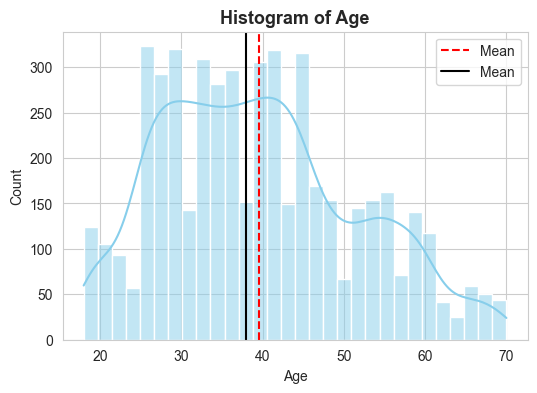

In [9]:
# Age feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.axvline(df.Age.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Age.median(), color='black', label='Mean')
plt.title('Histogram of Age', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median is lower than the mean, the missing values should be filled with the median value.

In [10]:
# Filling the missing values with Median.
df['Age'].fillna(df.Age.median())

0       38.0
1       38.0
2       38.0
3       38.0
4       38.0
        ... 
5032    33.0
5033    49.0
5034    59.0
5035    43.0
5036    44.0
Name: Age, Length: 5000, dtype: float64

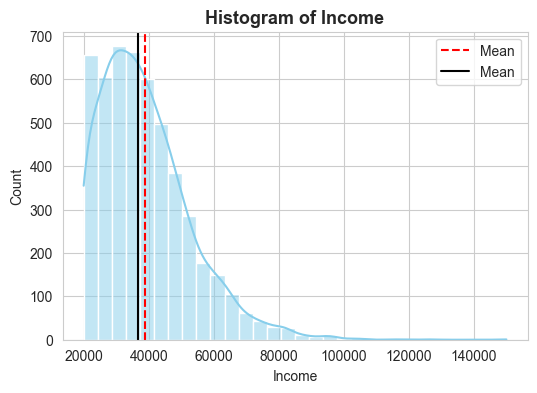

In [11]:
# Income feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Income', bins=30, kde=True, color='skyblue')
plt.axvline(df.Income.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Income.median(), color='black', label='Mean')
plt.title('Histogram of Income', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median is lower than the mean, the missing values should be filled with the median value.

In [12]:
# Filling the missing values with Median.
df['Income'].fillna(df.Income.median())

0       46207.0
1       57772.0
2       26054.0
3       58508.0
4       35518.0
         ...   
5032    33529.0
5033    47840.0
5034    20000.0
5035    50349.0
5036    32073.0
Name: Income, Length: 5000, dtype: float64

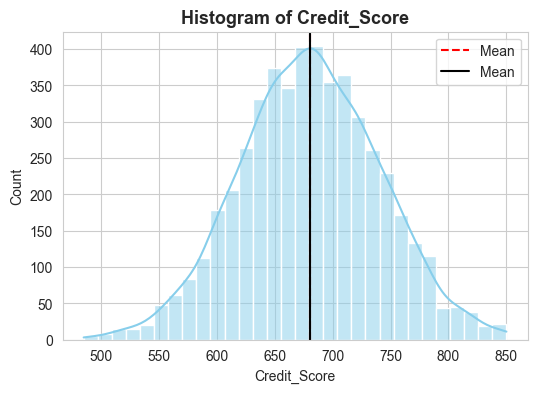

In [13]:
# Credit_Score feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Credit_Score', bins=30, kde=True, color='skyblue')
plt.axvline(df.Credit_Score.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Credit_Score.median(), color='black', label='Mean')
plt.title('Histogram of Credit_Score', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median and mean are almost same, missing values can be filled with either of them. Lets use the median value.

In [14]:
# Filling the missing values with Median.
df['Credit_Score'].fillna(df.Credit_Score.median())

0       655.0
1       630.0
2       516.0
3       667.0
4       661.0
        ...  
5032    537.0
5033    684.0
5034    760.0
5035    606.0
5036    609.0
Name: Credit_Score, Length: 5000, dtype: float64

⭐ **Conclution:**
- Initially, there were 5037 values and 10 features in this dataset.
- There were 37 duplicated rows, which were dropped.
- There were 41 missing values, which were filled with their median value.
- Final number of values is 5000, with no missing value.

## Exploratory data analysis

In [15]:
# Value count of purchase column
df['Purchased'].value_counts()

Purchased
Yes    3013
No     1987
Name: count, dtype: int64

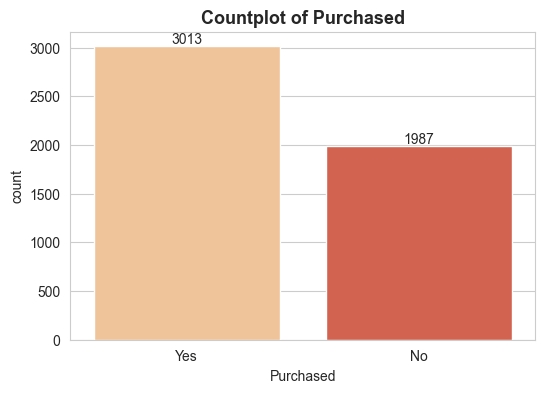

In [16]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Purchased', palette='OrRd')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Countplot of Purchased', fontsize=13, fontweight='bold')
plt.show()

In [17]:
print(f'Percentage of Yes: {round(3013/(3013+1987) * 100, 2)}%')
print(f'Percentage of No: {round(1987/(3013+1987) * 100, 2)}%')

Percentage of Yes: 60.26%
Percentage of No: 39.74%


⭐ **Conclution:**
- 2235 (60.26%) people purchased and  2765 (55.3%) people did not purchased.
- This is not a strongly imbalanced dataset and no need for oversampling.

In [18]:
# Function to plot countplot
def feature_count_plot(feature: str, palette = 'Accent'):
    plt.figure(figsize=(16, 6))

    plt.subplot(121)
    ax = sns.countplot(data=df, x=feature, palette=palette)

    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    
    plt.title(f'Count of {feature}', fontsize=13, fontweight='bold')
    

    plt.subplot(122)
    bx = sns.countplot(data=df, x=feature, palette=palette, hue='Purchased')

    for container in bx.containers:
        bx.bar_label(container, fontsize=10)
    
    plt.title(f'Count of {feature} by Purchased', fontsize=13, fontweight='bold')

    plt.show()

In [19]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income', 'Car_Type', 'Marital_Status',
       'Has_Children', 'Education', 'Credit_Score', 'Purchased'],
      dtype='object')

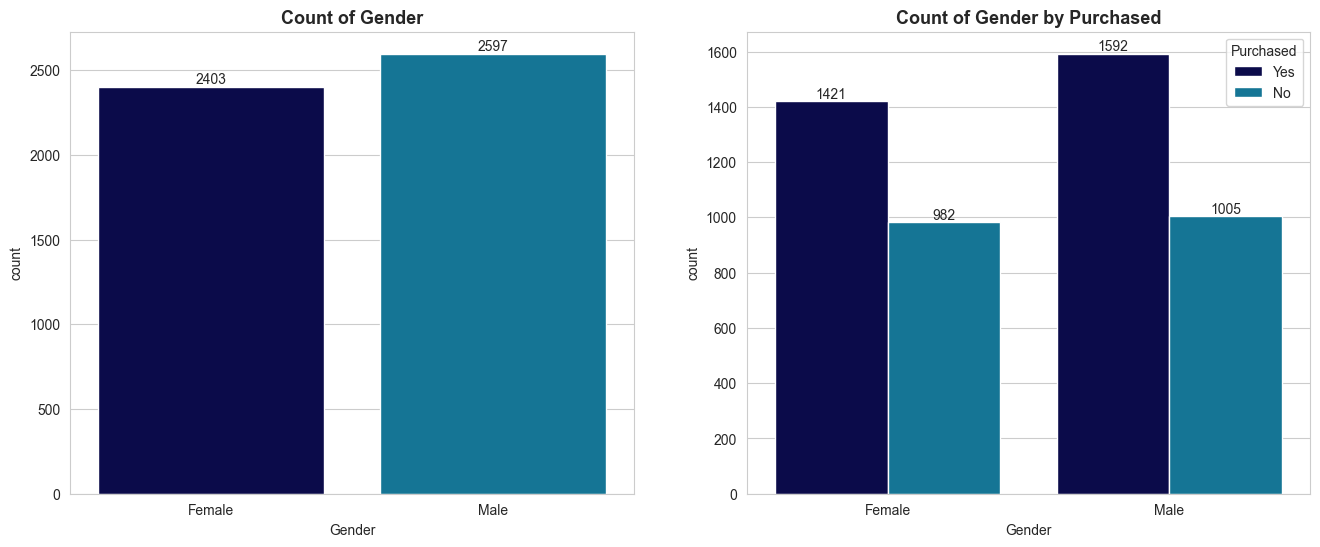

In [20]:
# Gender Feature

feature_count_plot('Gender', 'ocean')

⭐ **Conclution:**
- Gender has no influence in Purchase outcome.

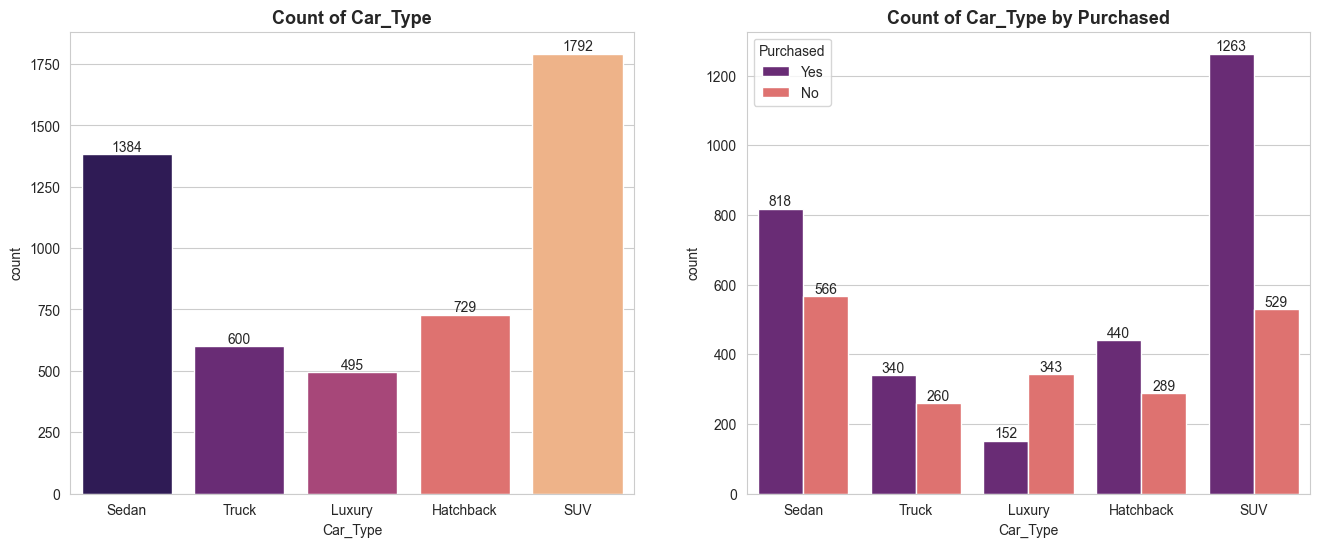

In [21]:
# Car_Type Feature

feature_count_plot('Car_Type', 'magma')

⭐ **Conclution:**
- Car_Type has influence in Purchase outcome.
- Suv and Sedan has purchsed more compare to other car types.

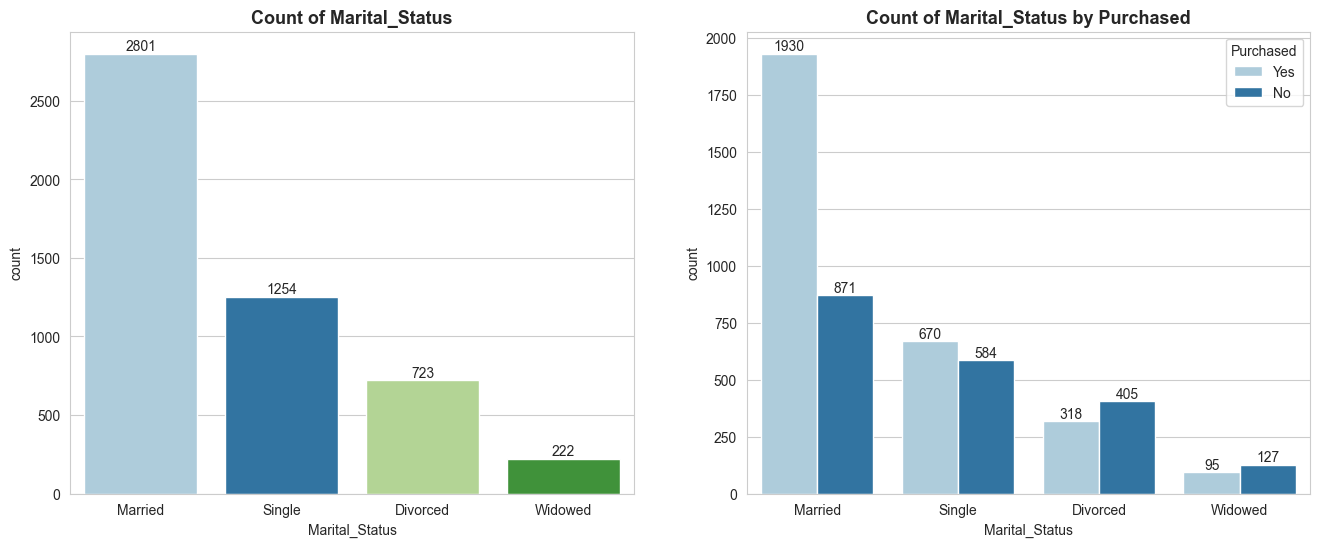

In [22]:
# Marital_Status

feature_count_plot('Marital_Status', 'Paired')

⭐ **Conclution:**
- Married people have higher purchase than others.

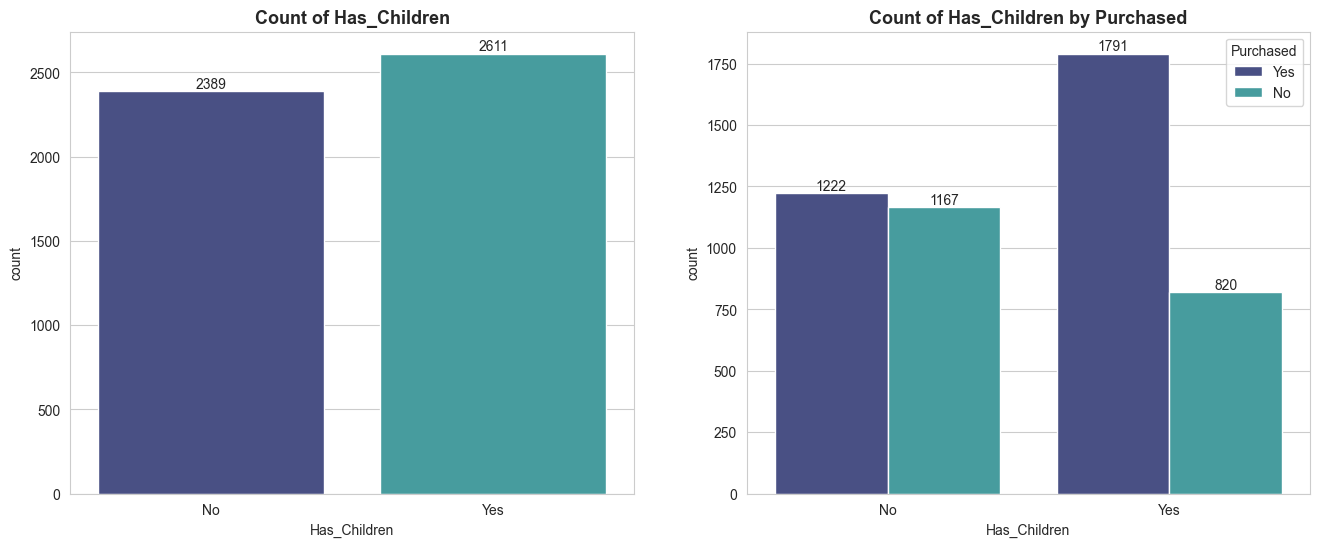

In [23]:
# Has_Children Feature

feature_count_plot('Has_Children', 'mako')

⭐ **Conclution:**
- Perchase probability is higher for the people with childern.

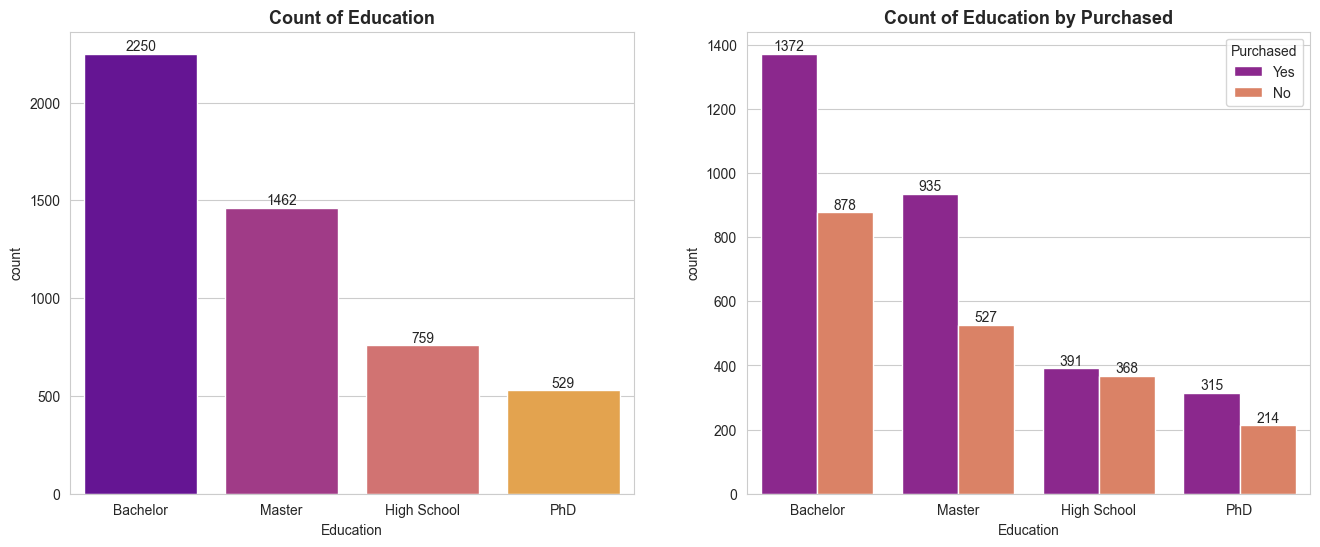

In [24]:
# Education Feature
feature_count_plot('Education', 'plasma')

⭐ **Conclution:**
- Bachelor and master has higher purchasing probability.

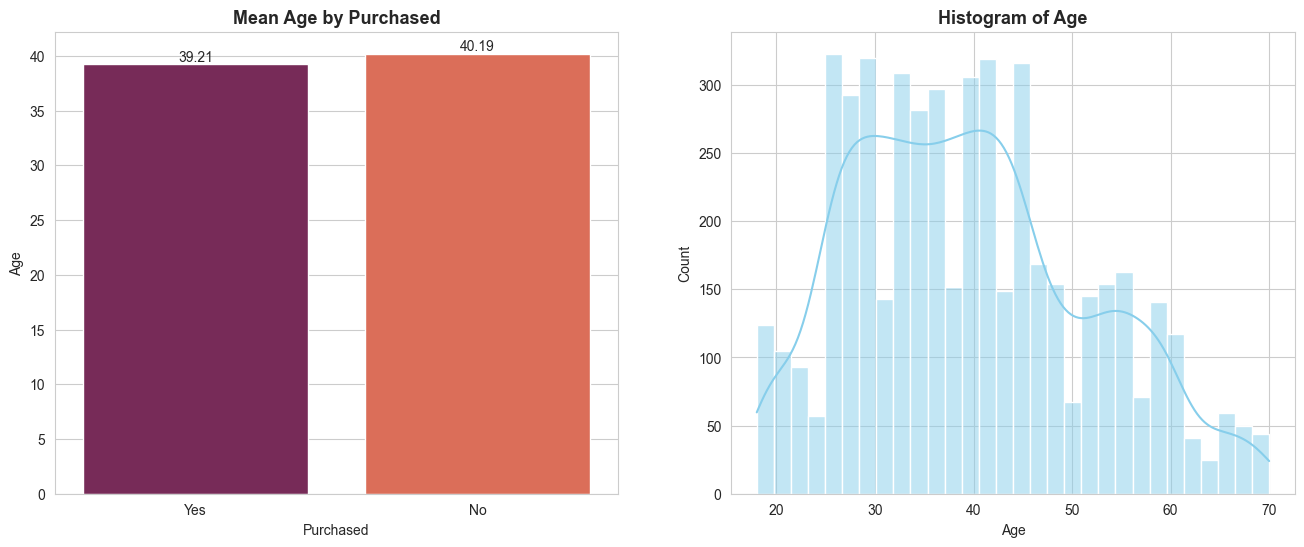

In [30]:
# Age feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Age', ci=None, palette='rocket')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Age by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Age', color='skyblue', bins=30, kde=True)
plt.title('Histogram of Age', fontsize=13, fontweight='bold')

plt.show()

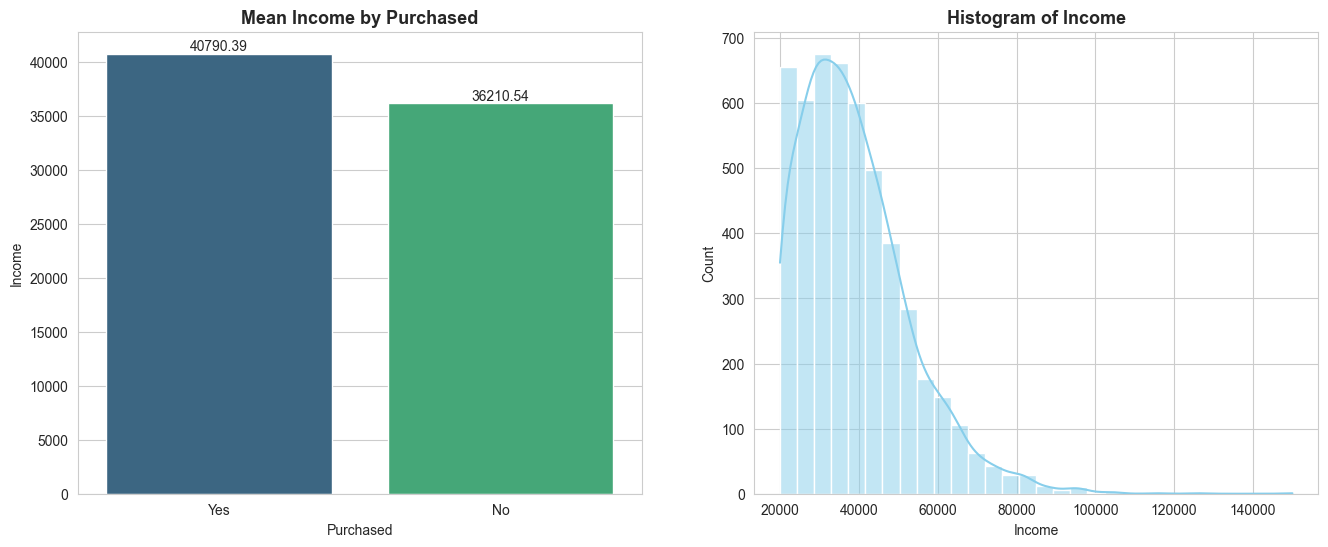

In [29]:
# Income feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Income', ci=None, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Income by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Income', color='skyblue', bins=30, kde=True)
plt.title('Histogram of Income', fontsize=13, fontweight='bold')

plt.show()

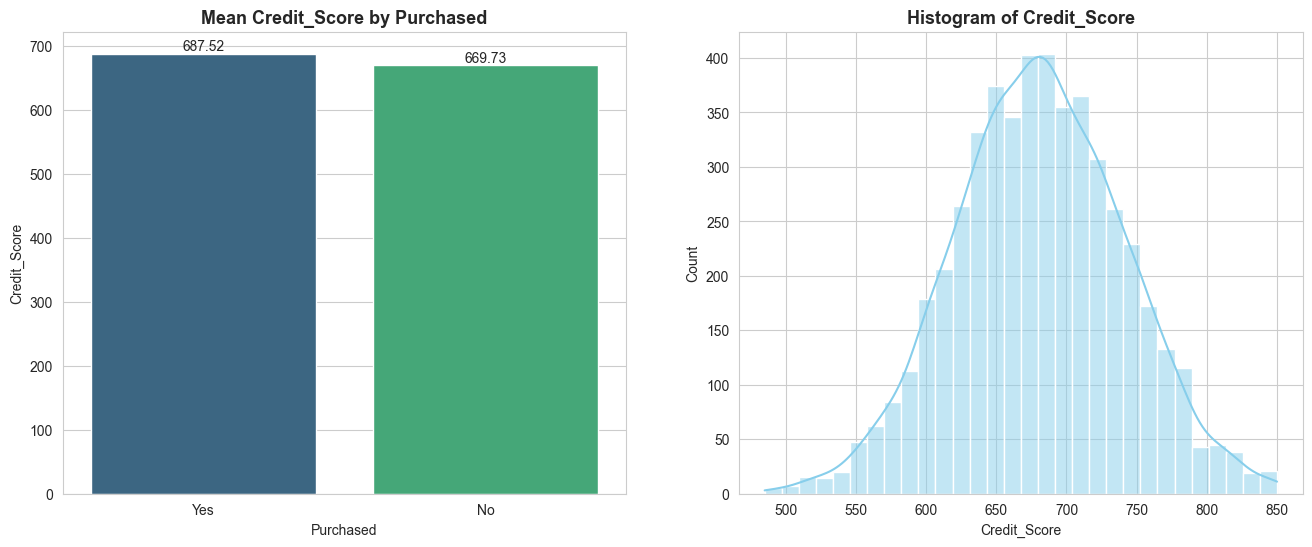

In [31]:
# Credit_Score feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Credit_Score', ci=None, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Credit_Score by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Credit_Score', color='skyblue', bins=30, kde=True)
plt.title('Histogram of Credit_Score', fontsize=13, fontweight='bold')

plt.show()

## Feature Engineering

In [ ]:
# Coverting Age to Age_Group

age_groups = {
    'Youth' : 
}